In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
## Helper function
def add_front_padding(x):
    zipcode = str(x)
    while len(zipcode) < 5:
        zipcode = "0"+zipcode
    return zipcode

In [11]:
data = pd.read_csv("../data/fcc_census.csv")
data = data.set_index('tract_geoid')
data

,All_Provider_Count,All_Providers,MaxAdDown,MaxAdUp,AllMaxAdDown,AllMaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,...,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
tract_geoid,,,,,,,,,,,,,,,,,,,,,
1001020100,7,"{56004, 58757, 54694, 67056, 59349, 55262, 58623}",1000.0,50.0,"{0.0, 0.768, 1.5, 3.0, 100.0, 2.0, 6.0, 1000.0...","{0.0, 0.512, 0.128, 35.0, 3.0, 0.384, 0.768, 0...",3.0,4,0.0,5.0,...,0.000000,74.047955,7.475317,18.476728,1001020100,9817813,28435,3.791,0.011,52571.880770
1001020200,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",1000.0,50.0,"{0.0, 1.5, 2.0, 3.0, 100.0, 6.0, 1000.0, 10.0,...","{0.0, 0.384, 0.512, 35.0, 3.0, 0.128, 0.768, 0...",6.0,4,0.0,4.0,...,0.000000,66.860465,7.848837,25.290698,1001020200,3325680,5669,1.284,0.002,152570.093458
1001020300,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",1000.0,50.0,"{0.0, 2.0, 100.0, 6.0, 1000.0, 940.0, 12.0, 18...","{0.0, 0.512, 0.768, 35.0, 3.0, 1.3, 50.0}",6.0,4,0.0,4.0,...,0.000000,78.529412,9.411765,12.058824,1001020300,5349273,9054,2.065,0.003,169830.508475
1001020400,8,"{56004, 58757, 54694, 67056, 59349, 55514, 552...",1000.0,50.0,"{0.0, 0.768, 1.5, 3.0, 100.0, 5.0, 6.0, 2.0, 1...","{0.0, 0.512, 0.128, 35.0, 3.0, 0.384, 0.768, 0...",4.0,4,0.0,5.0,...,0.417910,85.313433,6.865672,7.402985,1001020400,6384276,8408,2.465,0.003,157322.515213
1001020500,13,"{56004, 58757, 54694, 56170, 54860, 54927, 670...",1000.0,1000.0,"{0.0, 1.5, 2.0, 100.0, 6.0, 1000.0, 75.0, 940....","{0.0, 0.512, 0.128, 35.0, 3.0, 0.768, 5.0, 1.3...",9.0,4,0.0,5.0,...,0.000000,89.025206,5.688155,5.286638,1001020500,11408866,43534,4.405,0.017,240544.835414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,10,"{56004, 56358, 54694, 57421, 59469, 56273, 593...",1000.0,1000.0,"{0.0, 2.0, 35.0, 5.0, 1000.0, 40.0, 10.0, 940....","{0.0, 1.0, 2.0, 3.0, 35.0, 1.3, 6.0, 1000.0, 1...",5.0,4,4.0,7.0,...,1.336478,82.389937,7.940252,8.333333,56043000200,5780716345,9742603,2231.947,3.762,136.696794
56043000301,11,"{56004, 56358, 54694, 56683, 57421, 59469, 562...",1000.0,1000.0,"{0.0, 2.0, 35.0, 1000.0, 10.0, 940.0, 15.0, 50...","{0.0, 1.0, 1.3, 3.0, 35.0, 1000.0, 10.0, 20.0}",4.0,4,3.0,5.0,...,1.504425,71.858407,6.814159,19.823009,56043000301,1993203,0,0.770,0.000,322337.662338
56043000302,10,"{56004, 56358, 54694, 57421, 59469, 56273, 593...",1000.0,1000.0,"{0.0, 2.0, 35.0, 1000.0, 10.0, 940.0, 15.0, 25...","{0.0, 1.0, 1.3, 3.0, 35.0, 1000.0, 10.0}",3.0,4,3.0,5.0,...,0.000000,77.154725,12.876428,9.968847,56043000302,15429213,687001,5.957,0.265,41866.711432


In [12]:
data.columns

Index(['All_Provider_Count', 'All_Providers', 'MaxAdDown', 'MaxAdUp',
       'AllMaxAdDown', 'AllMaxAdUp', 'Wired_Provider_Count',
       'Satellite_Provider_Count', 'Fixed_Wireless_Provider_Count',
       'All_Provider_Count_25', 'All_Provider_Count_100',
       'Fixed_Wireless_Provider_Count_25', 'Wired_Provider_Count_25',
       'Satellite_Provider_Count_25', 'Fixed_Wireless_Provider_Count_100',
       'Wired_Provider_Count_100', 'Satellite_Provider_Count_100', 'NAME',
       'total_pop2', 'median_age_overall', 'median_age_male',
       'median_age_female', 'state', 'county', 'tract', 'employment_rate',
       'median_income', 'total_households', 'ave_household_size',
       'ave_family_size', 'pct_health_ins_children', 'pct_health_ins_19_64',
       'pct_health_ins_65+', 'total_population', 'median_house_value',
       'pct_white', 'pct_hisp_latino', 'pct_black', 'pct_native', 'pct_asian',
       'pct_hi_pi', 'pct_other_race', 'pct_two+_race', 'pct_rent_burdened',
       'poverty_r

In [13]:
eda_df = data[['employment_rate','pct_computer','pct_computer_with_dialup', 'pct_computer_with_broadband', 'pct_computer_no_internet', 'pct_no_computer',
               'pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+',#'RUCA1', 'RUCA2',
              'median_age_overall', 'median_age_male', 'median_age_female']]
eda_df

,employment_rate,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,median_age_overall,median_age_male,median_age_female
tract_geoid,,,,,,,,,,,,
1001020100,58.9,81.523272,0.000000,74.047955,7.475317,18.476728,97.9,85.9,100.0,38.9,36.8,40.1
1001020200,45.9,74.709302,0.000000,66.860465,7.848837,25.290698,96.8,89.2,100.0,41.3,34.1,44.6
1001020300,61.7,87.941176,0.000000,78.529412,9.411765,12.058824,98.7,94.6,100.0,37.6,37.2,40.1
1001020400,53.5,92.597015,0.417910,85.313433,6.865672,7.402985,99.3,93.3,100.0,45.8,42.5,47.9
1001020500,61.1,94.713362,0.000000,89.025206,5.688155,5.286638,98.2,94.3,100.0,34.9,32.5,35.9
...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,55.6,91.666667,1.336478,82.389937,7.940252,8.333333,95.4,78.5,100.0,48.6,48.5,48.7
56043000301,65.7,80.176991,1.504425,71.858407,6.814159,19.823009,85.2,72.4,98.9,40.4,43.2,37.4
56043000302,56.7,90.031153,0.000000,77.154725,12.876428,9.968847,97.5,76.4,95.9,38.3,34.4,40.6


In [14]:
# key stats
eda_df.describe()

,employment_rate,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,median_age_overall,median_age_male,median_age_female
count,72410.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72121.000000,72294.000000,72018.000000,72384.000000,72354.000000,72276.000000
mean,58.763500,89.406795,0.362539,80.511737,8.532518,10.593205,95.180487,87.449733,99.044612,39.617972,38.398322,40.818467
std,10.848374,7.937941,0.774684,12.006167,6.182440,7.937941,6.371752,9.789080,2.902789,7.837908,8.010863,8.237439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.900000,5.100000,5.400000
25%,53.200000,85.313112,0.000000,73.772117,4.154027,4.695629,93.200000,82.900000,100.000000,34.400000,33.100000,35.200000
50%,60.100000,90.968021,0.000000,82.468694,7.255049,9.031979,97.300000,90.100000,100.000000,39.300000,37.900000,40.600000
75%,65.700000,95.304371,0.586012,89.583333,11.449217,14.686888,100.000000,94.500000,100.000000,44.400000,43.200000,46.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,82.800000,85.000000,85.300000


In [15]:
#check na
check_na = eda_df.isnull().sum()
check_na

employment_rate                 646
pct_computer                    829
pct_computer_with_dialup        829
pct_computer_with_broadband     829
pct_computer_no_internet        829
pct_no_computer                 829
pct_health_ins_children         935
pct_health_ins_19_64            762
pct_health_ins_65+             1038
median_age_overall              672
median_age_male                 702
median_age_female               780
dtype: int64

In [16]:
total_num = len(eda_df.index)
total_num

73056

In [17]:
#check na percentage
check_na_percentage = check_na/total_num
check_na_percentage

employment_rate                0.008843
pct_computer                   0.011347
pct_computer_with_dialup       0.011347
pct_computer_with_broadband    0.011347
pct_computer_no_internet       0.011347
pct_no_computer                0.011347
pct_health_ins_children        0.012798
pct_health_ins_19_64           0.010430
pct_health_ins_65+             0.014208
median_age_overall             0.009198
median_age_male                0.009609
median_age_female              0.010677
dtype: float64

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


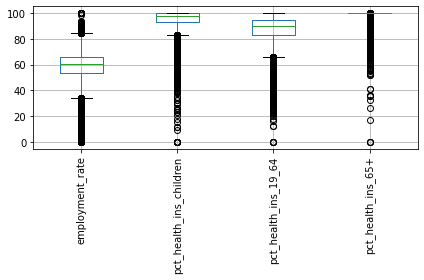

In [19]:
eda_df[['employment_rate','pct_health_ins_children', 'pct_health_ins_19_64', 'pct_health_ins_65+']].boxplot()
plt.xticks(rotation = 90)
plt.tight_layout()

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


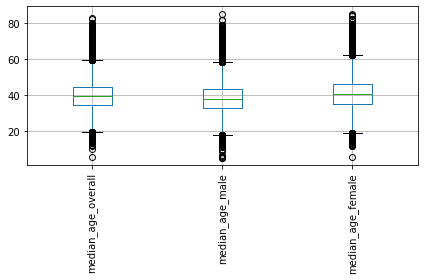

In [20]:
eda_df[['median_age_overall', 'median_age_male', 'median_age_female']].boxplot()
plt.xticks(rotation = 90)
plt.tight_layout()

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


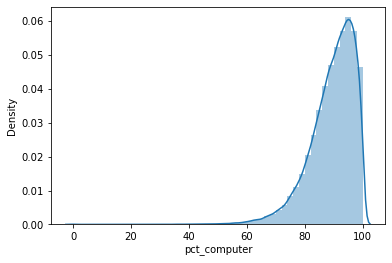

In [21]:
sns.distplot(eda_df['pct_computer'])

c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


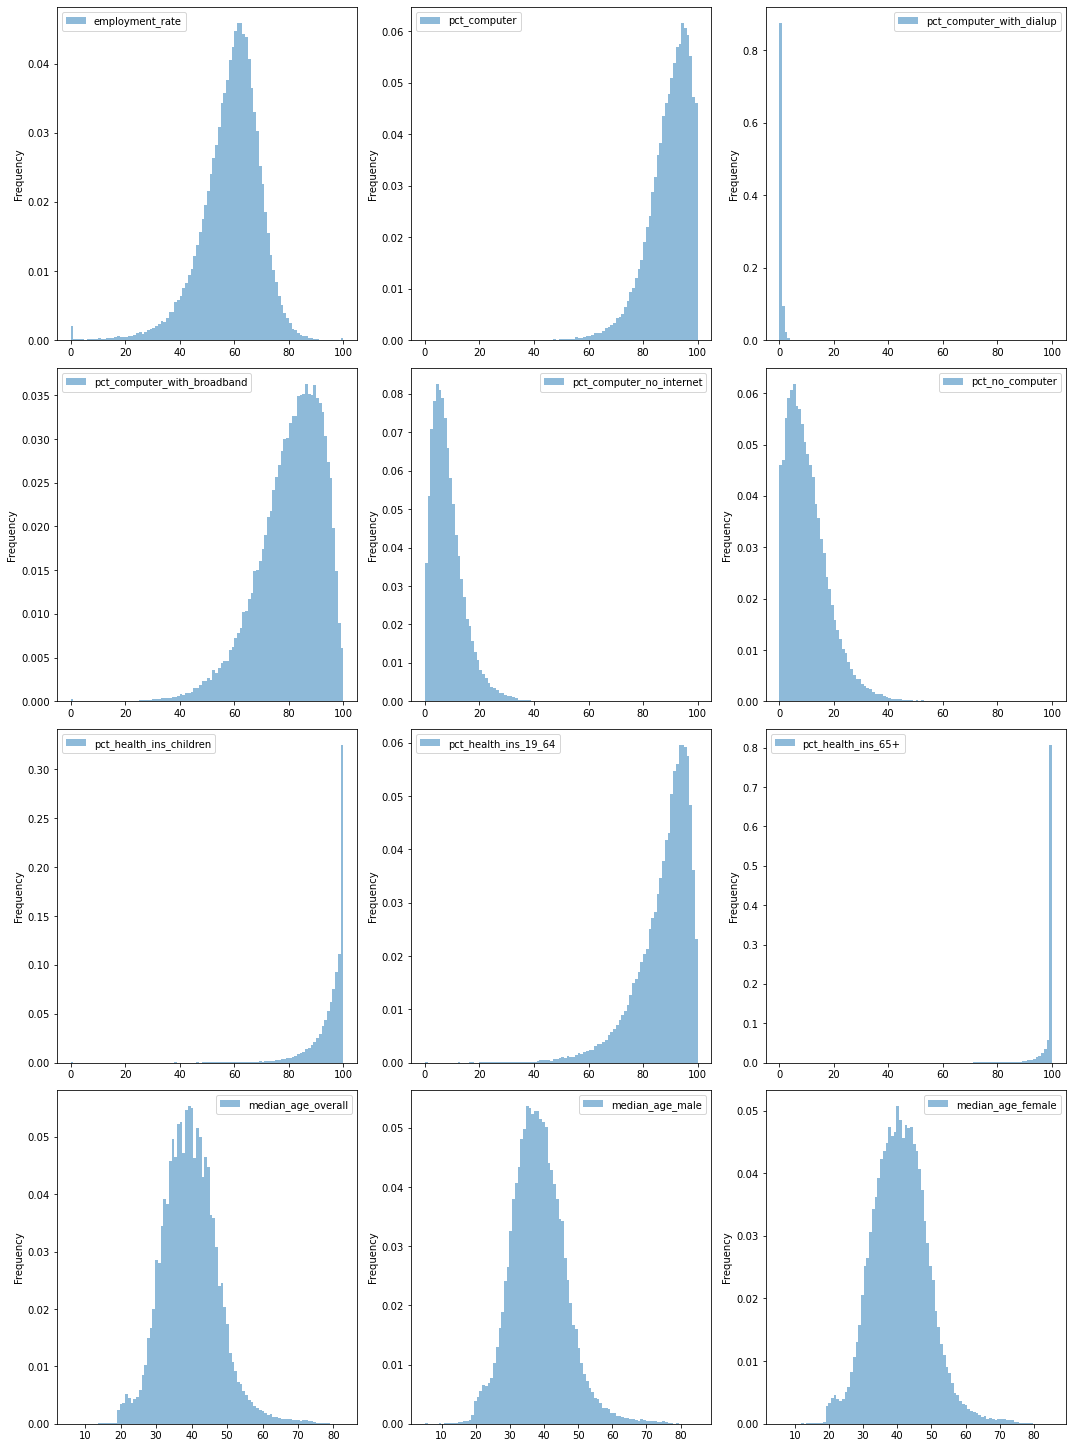

In [22]:
plt.figure(figsize=(15, 25))
plt.grid()
counter = 0
for col in eda_df.columns:
    counter = counter + 1
    axis = plt.subplot(5, 3, counter)
    df = eda_df[col].to_frame()
    df.plot.hist(density=True, bins = 100, ax=axis, alpha=0.5)
    
plt.tight_layout()

In [23]:
eda_df.skew()

employment_rate                -1.055538
pct_computer                   -1.524855
pct_computer_with_dialup       36.559443
pct_computer_with_broadband    -1.043920
pct_computer_no_internet        1.902547
pct_no_computer                 1.524855
pct_health_ins_children        -2.987973
pct_health_ins_19_64           -1.579806
pct_health_ins_65+             -7.480737
median_age_overall              0.486602
median_age_male                 0.556405
median_age_female               0.310950
dtype: float64

In [24]:
eda_df.kurtosis()

employment_rate                   3.160570
pct_computer                      5.139842
pct_computer_with_dialup       4102.057160
pct_computer_with_broadband       1.708469
pct_computer_no_internet         10.320990
pct_no_computer                   5.139842
pct_health_ins_children          17.715660
pct_health_ins_19_64              3.632656
pct_health_ins_65+              120.688119
median_age_overall                1.290658
median_age_male                   1.429854
median_age_female                 0.777983
dtype: float64